# Tensorflow NN Model

## A simple Deep network architectured to make predictions as follows

Given a dataset 'Car purchasing data' which holds data of people with their key financial variables/values.<br>
The goal is to find out the Car Purchasing Power/Amount of the individual.<br>
The model is made possible using Keras ( A python writen neural network library ).<br>
Also libraries like pandas, seaborn, sklearn, etc are used for data manipulation, visualizations, preprocessing etc.

### Importing libraries

In [6]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import pandas as pd
import numpy as np

import sklearn
from sklearn.model_selection import train_test_split

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### Reading our dataset file

In [7]:
df = pd.read_csv('../Dataset/Car_Purchasing_Data.csv', encoding='latin-1')

### To check for any Null values

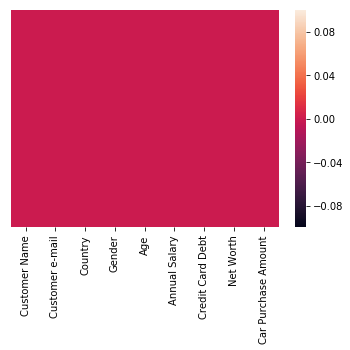

In [9]:
sns.heatmap(df.isnull(), yticklabels=False,)

## Some Visualizations

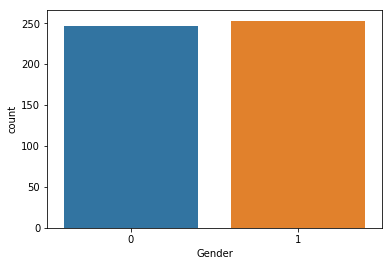

In [10]:
sns.countplot(x='Gender', data=df)

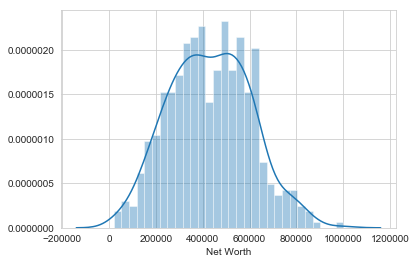

In [13]:
sns.set_style('whitegrid')
sns.distplot(df['Net Worth'], bins=30)

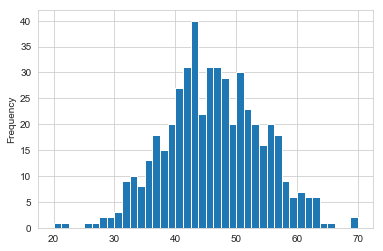

In [16]:
df['Age'].plot.hist(bins=40

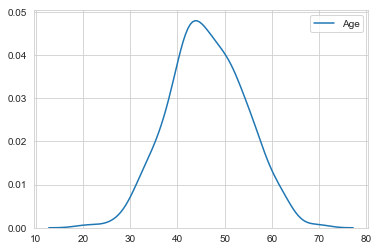

In [32]:
fig1 = sns.kdeplot(df['Age'],)

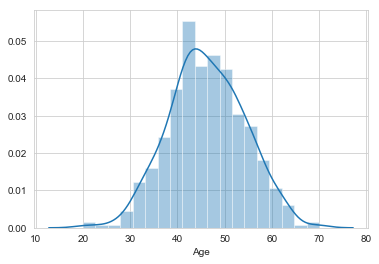

In [20]:
sns.distplot(df['Age'])

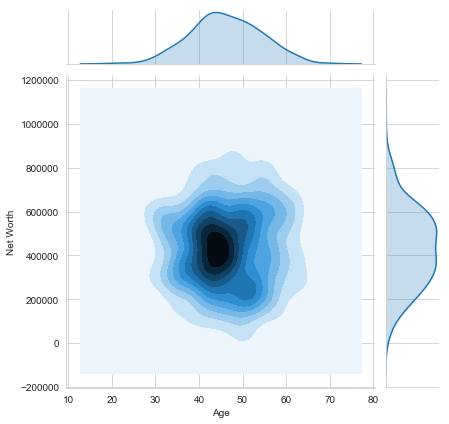

In [30]:
fig2 = sns.jointplot('Age', 'Net Worth', data=df, kind='kde')

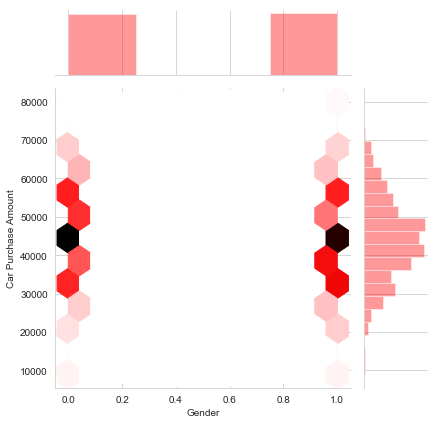

In [41]:
fig3 = sns.jointplot('Gender', 'Car Purchase Amount', df, kind='hex',ratio=4,color='red')

### Dataset Overview

In [6]:
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


### Omitting unusable Data

In [8]:
dataset = df.drop(['Customer Name', 'Customer e-mail', 'Country'], axis=1)

### Spilitting Data to training and testing sets

In [9]:
df_train = dataset.sample(frac=0.8, random_state=101)
df_test  = dataset.drop(df_train.index)

### Stats of the Dataset

In [10]:
df_stats = dataset.describe()
df_stats = df_stats.drop('Car Purchase Amount', axis=1)
df_stats = df_stats.transpose() 
df_stats

,count,mean,std,min,25%,50%,75%,max
Gender,500.0,0.506000,0.500465,0.0,0.000000,1.000000,1.000000,1.0
Age,500.0,46.241674,7.978862,20.0,40.949969,46.049901,51.612263,70.0
Annual Salary,500.0,62127.239608,11703.378228,20000.0,54391.977195,62915.497035,70117.862005,100000.0
Credit Card Debt,500.0,9607.645049,3489.187973,100.0,7397.515792,9655.035568,11798.867487,20000.0
Net Worth,500.0,431475.713625,173536.756340,20000.0,299824.195900,426750.120650,557324.478725,1000000.0


### Separating the value that is to be predicted by the model

In [11]:
lab_train = df_train.pop('Car Purchase Amount')
lab_test = df_test.pop('Car Purchase Amount')

### Normalizing the data

In [12]:
maxi = df_stats['max']
mini = df_stats['min']

In [13]:
def norm(a):
    return (a - mini)/(maxi-mini)   

In [14]:
norm_df_train = norm(df_train)
norm_df_test = norm(df_test)

### Structuring our models

In [53]:
#model v1
def model():
    model = Sequential([
        Dense(5, kernel_initializer='normal', activation='relu', input_dim=len(df_train.keys())),
        Dense(25, kernel_initializer='normal', activation='relu'),
        Dense(25, kernel_initializer='normal', activation='relu'),
        Dense(5, kernel_initializer='normal', activation='relu'),
        Dense(1)
    ])
    model.compile(loss='mse',
                 optimizer='adam',
                 metrics=['mae', 'mse'])
    return model

In [100]:
#model v2
def modelv2():
    model = Sequential([
        Dense(5, kernel_initializer='normal', activation='relu', input_dim=len(df_train.keys())),
        Dense(25, kernel_initializer='normal', activation='relu'),     
        Dense(50, kernel_initializer='normal', activation='relu'),         
        Dense(50, kernel_initializer='normal', activation='relu'),         
        Dense(50, kernel_initializer='normal', activation='relu'),         
        Dense(25, kernel_initializer='normal', activation='relu'),    
        Dense(1)
    ])
    model.compile(loss='mse',
                 optimizer='Adadelta',
                 metrics=['mae', 'mse'])
    return model

In [17]:
#model v3
def modelv3():
    model = Sequential([
        Dense(64, kernel_initializer='uniform', activation='relu', input_dim=len(df_train.keys())),
        Dense(128, kernel_initializer='uniform', activation='relu'),   
        Dense(1)
    ])
    model.compile(loss='mse',
                 optimizer='Adadelta',
                 metrics=['mae', 'accuracy'])
    return model

## Getting started with model v1

In [54]:
#v1
model = modelv1()

W0524 13:40:34.386541 10180 deprecation.py:506] From C:\Users\uV\Anaconda3\lib\site-packages\tensorflow\python\keras\initializers.py:143: calling RandomNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [55]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_13 (Dense)             (None, 25)                150       
_________________________________________________________________
dense_14 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 130       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 6         
Total params: 966
Trainable params: 966
Non-trainable params: 0
_________________________________________________________________


1500 epochs - batch_size 3

In [56]:
history = model.fit(norm_df_train, lab_train, epochs=1500, batch_size=3, validation_split=0.1, verbose=0)

In [57]:
hist = pd.DataFrame(history.history)
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error
495,33.447544,4.212931,33.447544,8.228773,2.423096,8.228773
496,30.424778,4.498782,30.424778,58.313537,7.243750,58.313538
497,61.516466,5.853263,61.516476,161.081808,12.394580,161.081802
498,544.908797,17.713076,544.908752,34.210983,5.041308,34.210979
499,54.795566,5.892299,54.795567,2.549301,1.298340,2.549301


Adding 500 epochs

In [70]:
history = model.fit(norm_df_train, lab_train, epochs=500, validation_split=0.1, verbose=0)

In [71]:
hist = pd.DataFrame(history.history)
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error
245,4.429854,1.688544,4.429854,6.638969,2.225537,6.638968
246,9.016558,2.412929,9.016557,10.940936,2.979102,10.940936
247,11.678123,2.810967,11.678123,28.220911,4.996728,28.220911
248,13.127082,3.047694,13.127082,11.239239,3.041358,11.239240
249,14.541688,3.103779,14.541688,7.863389,2.475342,7.863389


### Evaluating the model

In [73]:
print('\n# Evaluate on test data')
results = model.evaluate(norm_df_test, lab_test, batch_size=128)
print('test loss, test acc:', results)


# Evaluate on test data
100/100 [==============================] - 0s 24us/sample - loss: 8.5999 - mean_absolute_error: 2.4945 - mean_squared_error: 8.5999
test loss, test acc: [8.599937438964844, 2.494502, 8.599937]


## Getting started with model v2

In [101]:
# v2
modelv2 = modelv2()

In [103]:
modelv2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_41 (Dense)             (None, 25)                150       
_________________________________________________________________
dense_42 (Dense)             (None, 50)                1300      
_________________________________________________________________
dense_43 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_44 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_45 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_46 (Dense)             (None, 1)               

2000 epochs, batchsize =3

In [104]:
history = modelv2.fit(norm_df_train, lab_train, epochs=2000, batch_size=3,  validation_split=0.1, verbose=0)

In [112]:
hist = pd.DataFrame(history.history)
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error
1995,618.710345,3.891984,618.710327,26.915754,2.281592,26.915752
1996,617.650514,3.805222,617.650513,25.820088,2.232324,25.820089
1997,613.744121,3.859879,613.744080,25.732111,2.434473,25.732111
1998,610.149577,3.909711,610.149475,25.147380,2.346484,25.147381
1999,611.129215,4.029904,611.129211,34.193873,3.331933,34.193871


Adding 2000 epochs, batchsize =3

In [113]:
history = modelv2.fit(norm_df_train, lab_train, epochs=1000, batch_size=3,  validation_split=0.1, verbose=0)

In [114]:
hist = pd.DataFrame(history.history)
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error
995,11.077146,1.753890,11.077147,2.325124,1.249170,2.325124
996,12.099929,1.866753,12.099930,2.975227,1.394287,2.975227
997,11.440328,1.708672,11.440330,1.896145,1.088721,1.896145
998,11.526477,1.750765,11.526479,3.409964,1.550732,3.409963
999,10.720339,1.675480,10.720342,4.809765,1.897461,4.809765


Adding 250 epochs

In [116]:
history = modelv2.fit(norm_df_train, lab_train, epochs=250, validation_split=0.1, verbose=0)

In [117]:
hist = pd.DataFrame(history.history)
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error
245,12.609580,2.400480,12.609580,10.147168,2.868310,10.147168
246,10.788921,2.116187,10.788922,2.784519,1.326807,2.784519
247,8.327985,1.534123,8.327986,2.392337,1.244238,2.392337
248,8.961821,1.674287,8.961822,4.762779,1.879443,4.762779
249,9.174279,1.723728,9.174278,13.494131,3.423438,13.494131


### Evaluating the model

In [118]:
print('\n# Evaluate on test data')
results = modelv2.evaluate(norm_df_test, lab_test, batch_size=128)
print('test loss, test acc:', results)


# Evaluate on test data
100/100 [==============================] - 0s 10us/sample - loss: 1262.3376 - mean_absolute_error: 7.2656 - mean_squared_error: 1262.3376
test loss, test acc: [1262.337646484375, 7.2655764, 1262.3376]


## Getting started with model v3

In [18]:
modelv3 = modelv3()

W0524 17:03:15.118548  6280 deprecation.py:506] From C:\Users\uV\Anaconda3\lib\site-packages\tensorflow\python\keras\initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0524 17:03:15.122503  6280 deprecation.py:506] From C:\Users\uV\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [19]:
modelv3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________


6000 epochs, batchsize 5

In [22]:
history = modelv3.fit(norm_df_train, lab_train, epochs=6000, batch_size=3,  validation_split=0.1, verbose=0)

In [23]:
hist = pd.DataFrame(history.history)
hist.tail()

,loss,mean_absolute_error,acc,val_loss,val_mean_absolute_error,val_acc
3995,3.422815e+07,4607.774414,0.0,3.028234e+07,4431.220703,0.0
3996,3.422660e+07,4607.674805,0.0,3.028109e+07,4431.114258,0.0
3997,3.422507e+07,4607.586914,0.0,3.028003e+07,4431.022949,0.0
3998,3.422361e+07,4607.470703,0.0,3.027901e+07,4430.936523,0.0
3999,3.422213e+07,4607.375488,0.0,3.027801e+07,4430.848145,0.0


## Visualizing the predictions

In [ ]:
sns.set_style('whitegrid')

In [ ]:
test_predictions_model = model.predict(norm_df_test).flatten()

### Model v1

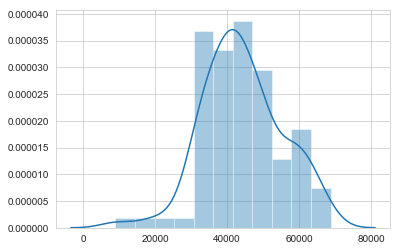

In [132]:
# predictions
sns.distplot(test_predictions_model)

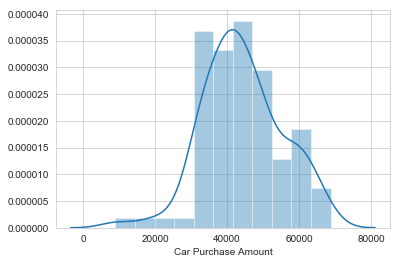

In [133]:
# Actual data
sns.distplot(lab_test)

### Model v2

In [134]:
test_predictions_modelv2 = modelv2.predict(norm_df_test).flatten()


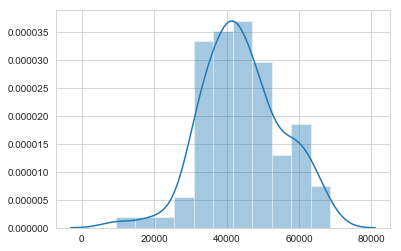

In [136]:
# predictions
sns.distplot(test_predictions_modelv2)

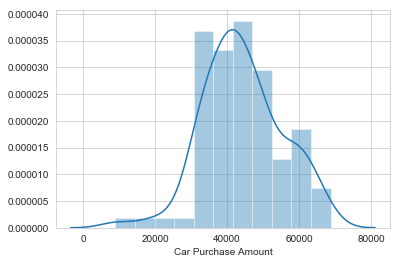

In [137]:
# Actual data
sns.distplot(lab_test)